In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
from darwinian_shift import DarwinianShift, BigwigLookup, hide_top_and_right_axes

/Users/mh28/miniconda3/envs/dsenv3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/mh28/miniconda3/envs/dsenv3/lib/python3.8/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [3]:
# Colours
unobserved_colour = '#979797'
observed_colour = '#EE7733'

In [4]:
# The BigWig file can be downloaded from here http://hgdownload.soe.ucsc.edu/goldenPath/hg19/phyloP100way/
# or by running 
# wget http://hgdownload.soe.ucsc.edu/goldenPath/hg19/phyloP100way/hg19.100way.phyloP100way.bw 
# Warning This file is approx 9Gb.
bw = BigwigLookup("hg19.100way.phyloP100way.bw", name='Phylop score')

In [5]:
transmembrane_section = {
    'transcript_id': 'ENST00000277541', 
        'start': 1736, 'end': 1756
}

In [6]:
d_skin = DarwinianShift(
    data = pd.read_excel('248092_3_supp_6645104_q35h43.xlsx', sheet_name='Table S4', skiprows=4),
    source_genome='GRCh37',
    spectra='skin_trinuc_spectrum.txt',
    lookup=bw,
    included_mutation_types='missense'
)

In [7]:
d_oe = DarwinianShift(
    data=pd.read_excel('aau3879_TableS2.xlsx',
                       sheet_name='Mutations_collapsed_by_distance', skiprows=17),
    source_genome='GRCh37',
    spectra='oesophagus_trinuc_spectrum.txt',
    lookup=bw,
    included_mutation_types='missense'
)

# Skin

In [8]:
s = d_skin.run_section(transmembrane_section)

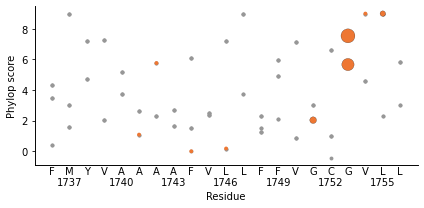

In [9]:
s.plot_scatter(show_residues=True, show_legend=False, figsize=(6, 3),
                    unobserved_mutation_colour=unobserved_colour, missense_mutation_colour=observed_colour,
                    unmutated_marker_size=15, base_marker_size=15)
hide_top_and_right_axes()
plt.tight_layout()

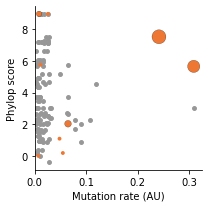

In [10]:
s.plot_mutation_rate_scatter(figsize=(3, 3), show_legend=False,
                            unobserved_mutation_colour=unobserved_colour, missense_mutation_colour=observed_colour,
                            unmutated_marker_size=15, base_marker_size=15)
hide_top_and_right_axes()
plt.title('')
plt.xlabel('Mutation rate (AU)')
plt.tight_layout()

# Oesophagus

In [11]:
s = d_oe.run_section(transmembrane_section)

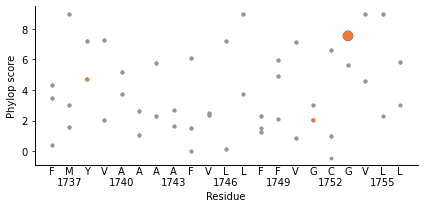

In [12]:
s.plot_scatter(show_residues=True, show_legend=False, figsize=(6, 3),
                    unobserved_mutation_colour=unobserved_colour, missense_mutation_colour=observed_colour,
                    unmutated_marker_size=15, base_marker_size=15)
hide_top_and_right_axes()
plt.tight_layout()

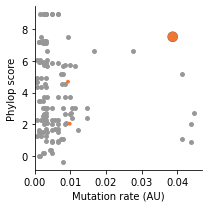

In [13]:
s.plot_mutation_rate_scatter(figsize=(3, 3), show_legend=False,
                            unobserved_mutation_colour=unobserved_colour, missense_mutation_colour=observed_colour,
                            unmutated_marker_size=15, base_marker_size=15)
hide_top_and_right_axes()
plt.title('')
plt.xlabel('Mutation rate (AU)')
plt.tight_layout()